In [75]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('/content/sample_data/iris.xlsx - iris.csv')

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
x=df.drop('species',axis=1)
y=df.species

In [7]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
d=DecisionTreeClassifier()

In [23]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
s=d.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score

In [32]:
#Using Gini

#Train Data
print(accuracy_score(y_train,d.predict(x_train)))

#Test Data
print(accuracy_score(y_test,s))

1.0
1.0


In [35]:
d1=DecisionTreeClassifier(criterion='entropy')
d1.fit(x_train,y_train)
pred=d1.predict(x_test)

In [36]:
#Using Entropy

#Train Data
print(accuracy_score(y_train,d1.predict(x_train)))

#Test Data
print(accuracy_score(y_test,pred))

1.0
0.98


In [37]:
from sklearn.tree import export_graphviz

In [38]:
from six import StringIO

In [39]:
from IPython.display import Image

In [41]:
import pydotplus

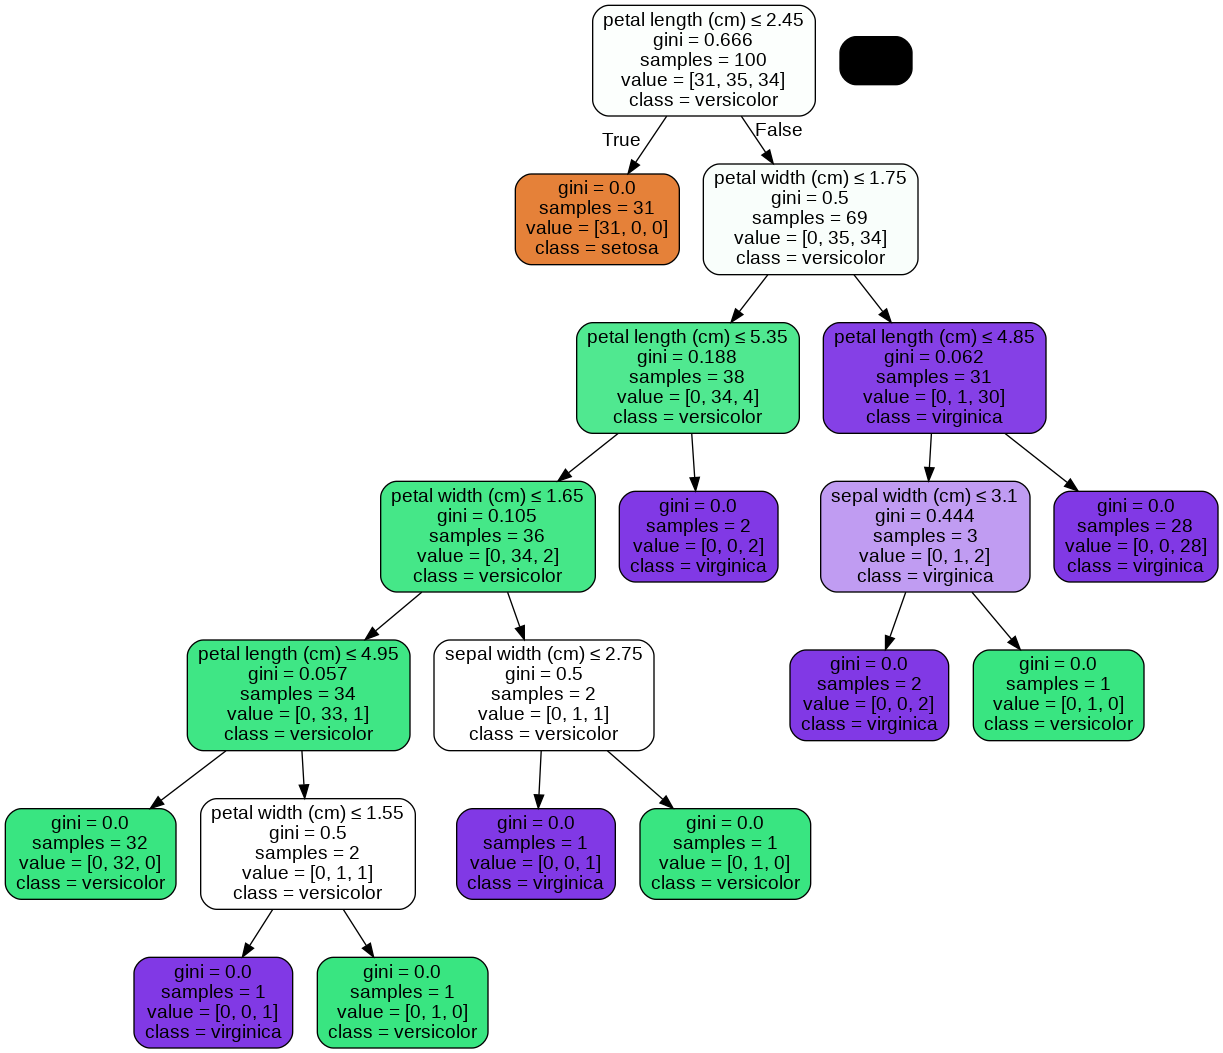

In [78]:
dot_data=StringIO()
export_graphviz(d,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=df.feature_names,class_names=df.target_names)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())